In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_excel ('seg1.xlsx', sheet_name='Sheet1', engine='openpyxl')

In [3]:
data.head()

,Customer,Gender,Age,Education,AnnualIncome,Occupation,Averagespendingscore,Market
0,1.0,1.0,54.0,1.0,12.0,1.0,15.0,Konzum
1,2.0,1.0,25.0,1.0,18.0,1.0,25.0,Bingo
2,3.0,0.0,26.0,1.0,18.0,1.0,15.0,Bingo
3,4.0,1.0,26.0,1.0,24.0,1.0,25.0,Konzum
4,5.0,0.0,25.0,1.0,24.0,1.0,35.0,Bingo


In [4]:
data.describe()

,Customer,Gender,Age,Education,AnnualIncome,Occupation,Averagespendingscore
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,0.600000,35.640000,0.590000,16.440000,0.840000,19.100000
std,29.011492,0.492366,9.528819,0.494311,5.160691,0.368453,6.371496
min,1.000000,0.000000,20.000000,0.000000,6.000000,0.000000,15.000000
25%,25.750000,0.000000,28.000000,0.000000,12.000000,1.000000,15.000000
50%,50.500000,1.000000,34.000000,1.000000,18.000000,1.000000,15.000000
75%,75.250000,1.000000,42.250000,1.000000,18.000000,1.000000,25.000000
max,100.000000,1.000000,62.000000,1.000000,24.000000,1.000000,35.000000


In [5]:
data.dtypes

Customer                float64
Gender                  float64
Age                     float64
Education               float64
AnnualIncome            float64
Occupation              float64
Averagespendingscore    float64
Market                   object
dtype: object

In [6]:
data["Customer"]=data["Customer"].astype("int64",errors='ignore')
data["Customer"].dtype

dtype('float64')

In [7]:
data.drop(["Customer"],axis=1,inplace=True)

In [8]:
data.head()

,Gender,Age,Education,AnnualIncome,Occupation,Averagespendingscore,Market
0,1.0,54.0,1.0,12.0,1.0,15.0,Konzum
1,1.0,25.0,1.0,18.0,1.0,25.0,Bingo
2,0.0,26.0,1.0,18.0,1.0,15.0,Bingo
3,1.0,26.0,1.0,24.0,1.0,25.0,Konzum
4,0.0,25.0,1.0,24.0,1.0,35.0,Bingo


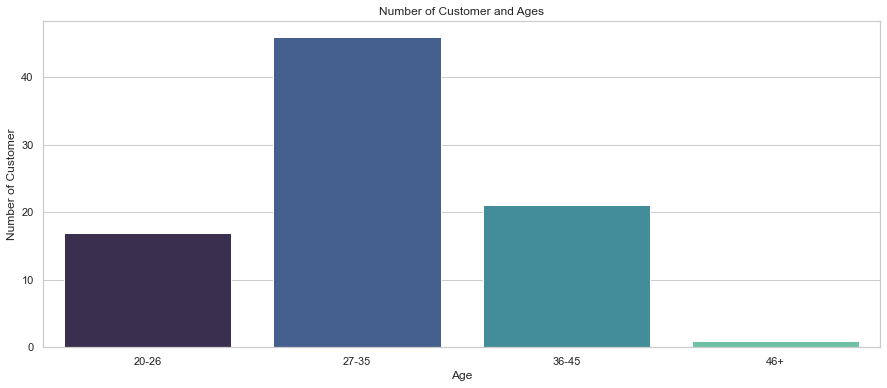

In [10]:
age_20_26=data.Age[(data.Age>=20)&(data.Age<=26)]
age_27_35=data.Age[(data.Age>=27)&(data.Age<=35)]
age_36_45=data.Age[(data.Age>=36)&(data.Age<=45)]

age_46above=data.Age[(data.Age>=62)]
                   
agex=["20-26", "27-35", "36-45","46+"]
agey=[len(age_20_26.values),len(age_27_35.values),len(age_36_45.values),len(age_46above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey, palette="mako")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

x1=data.loc[:,["Age", "Averagespendingscore"]].values

from sklearn.cluster import KMeans
wcss=[]
for k in range (1,11):
    kmeans=KMeans (n_clusters=k, init="k-means++")
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("k Value")
plt.ylabel("WCSS")
plt.show()

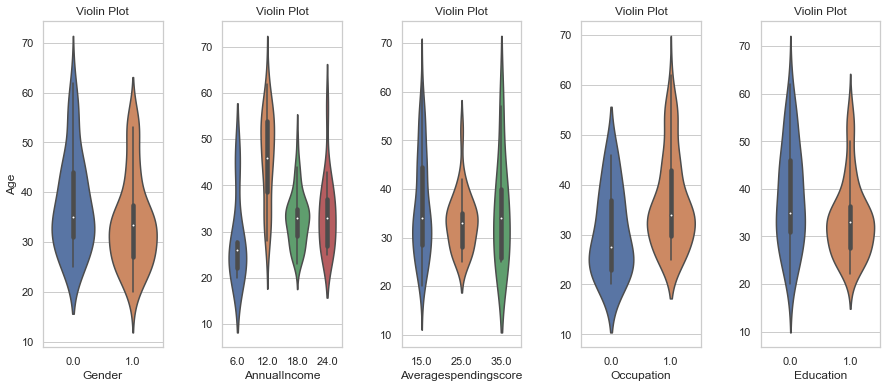

In [15]:
plt.figure(1,figsize=(15,6))
n=0
for cols in ["Gender","AnnualIncome","Averagespendingscore", "Occupation", "Education"]:
    n+=1
    plt.subplot(1,5,n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols,y="Age",data=data)
    plt.ylabel("Age" if n==1 else "")
    plt.title("Violin Plot")
plt.show()

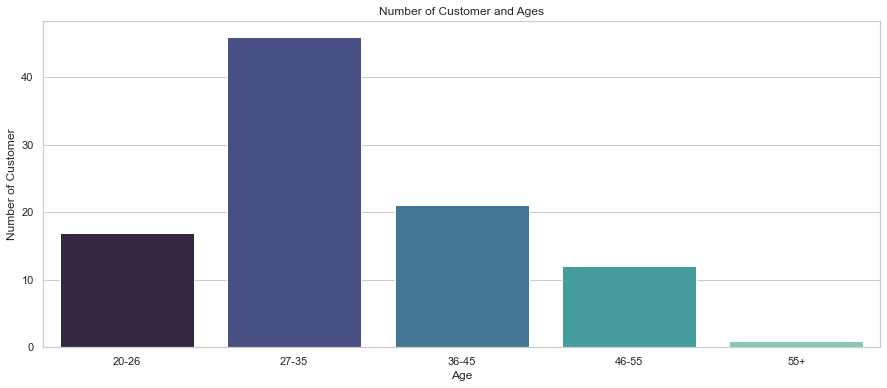

In [16]:
age_20_26=data.Age[(data.Age>=20)&(data.Age<=26)]
age_27_35=data.Age[(data.Age>=27)&(data.Age<=35)]
age_36_45=data.Age[(data.Age>=36)&(data.Age<=45)]
age_46_55=data.Age[(data.Age>=46)&(data.Age<=55)]
age_55above=data.Age[(data.Age>=62)]
                   
agex=["20-26", "27-35", "36-45", "46-55","55+"]
agey=[len(age_20_26.values),len(age_27_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey, palette="mako")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

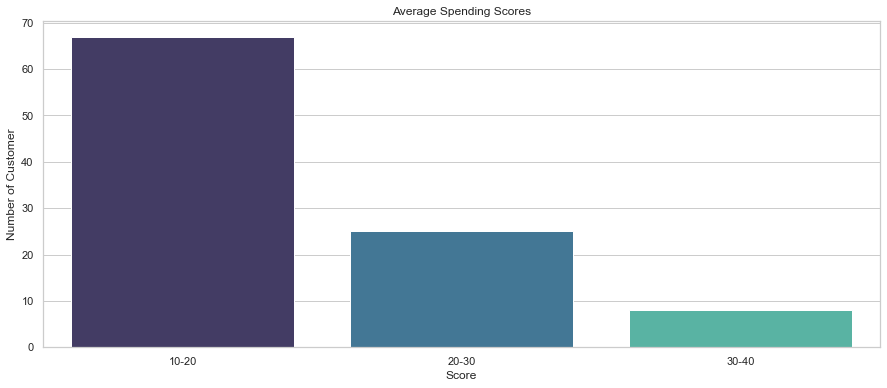

In [17]:
ss_10_20=data.Averagespendingscore[(data.Averagespendingscore>=10)&(data.Averagespendingscore<=15)]
ss_20_30=data.Averagespendingscore[(data.Averagespendingscore>=16)&(data.Averagespendingscore<=34)]
ss_30_40=data.Averagespendingscore[(data.Averagespendingscore>=35)&(data.Averagespendingscore<=40)]


ssx=["10-20", "20-30", "30-40"]
ssy=[len(ss_10_20.values),len(ss_20_30.values),len(ss_30_40.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="mako")
plt.title("Average Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer")
plt.show()

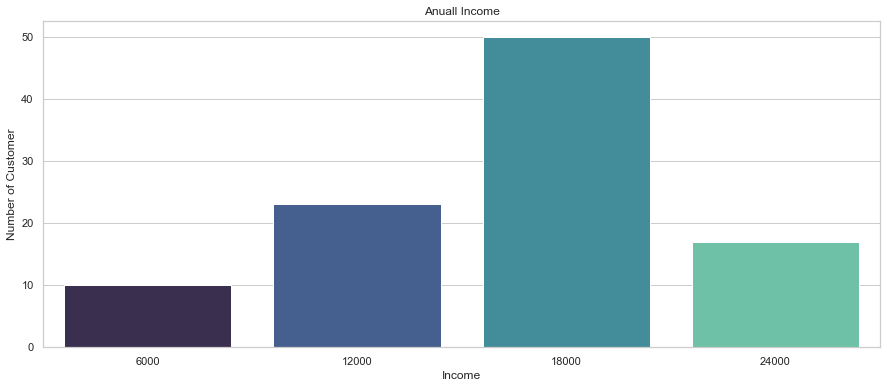

In [20]:
ai_0_500=data.AnnualIncome[(data.AnnualIncome>=0)&(data.AnnualIncome<=6)]
ai_500_1000=data.AnnualIncome[(data.AnnualIncome>=7)&(data.AnnualIncome<=12)]
ai_1000_1500=data.AnnualIncome[(data.AnnualIncome>=13)&(data.AnnualIncome<=18)]
ai_1500_2000=data.AnnualIncome[(data.AnnualIncome>=19)&(data.AnnualIncome<=24)]

aix=["6000", "12000", "18000","24000"]
aiy=[len(ai_0_500.values),len(ai_500_1000.values),len(ai_1000_1500.values), len(ai_1500_2000.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="mako")
plt.title("Anuall Income")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

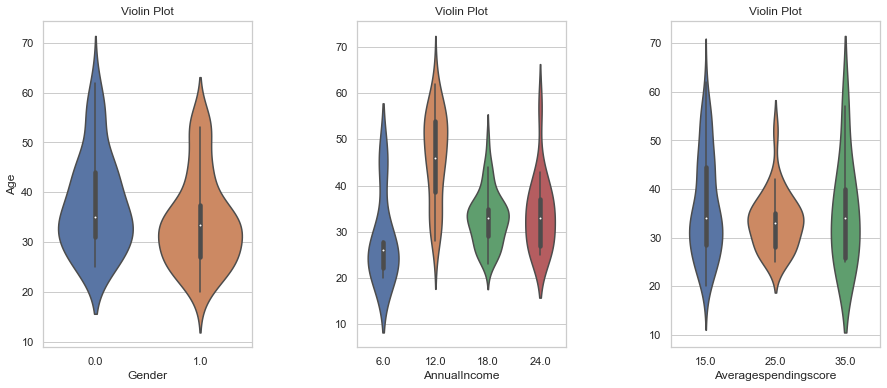

In [21]:
plt.figure(1,figsize=(15,6))
n=0
for cols in ["Gender","AnnualIncome","Averagespendingscore"]:
    n+=1
    plt.subplot(1,3,n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols,y="Age",data=data)
    plt.ylabel("Age" if n==1 else "")
    plt.title("Violin Plot")
plt.show()

<Figure size 1080x432 with 0 Axes>

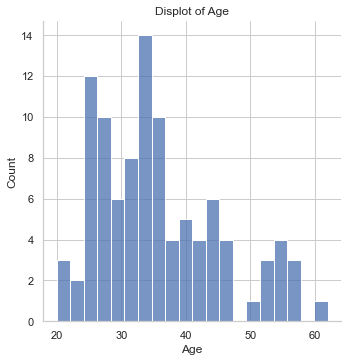

In [22]:
plt.figure(1,figsize=(15,6))
n=0
for x in ["Age"]:
    n=1
    
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.displot(data[x],bins=20)
    plt.title("Displot of {}".format(x))
plt.show()

<Figure size 1080x432 with 0 Axes>

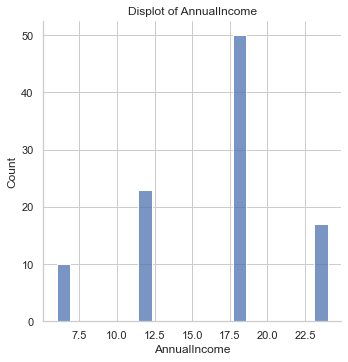

In [23]:
plt.figure(1,figsize=(15,6))
n=0
for x in ["AnnualIncome"]:
    n=1
    
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.displot(data[x],bins=20)
    plt.title("Displot of {}".format(x))
plt.show()

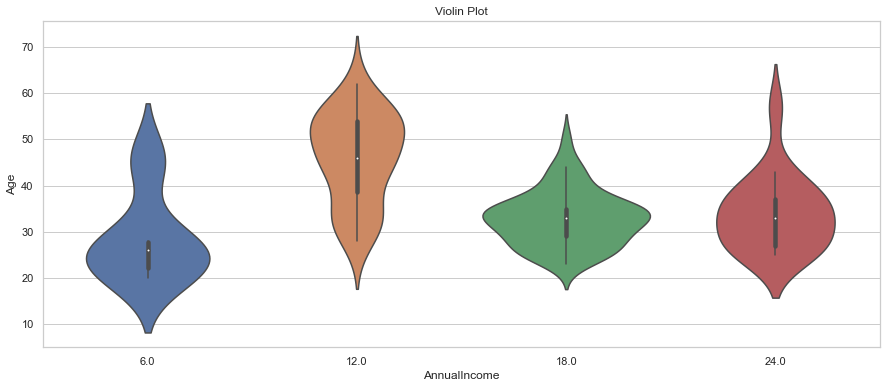

In [24]:
plt.figure(1,figsize=(15,6))
n=0
for cols in ["AnnualIncome"]:
    n+=1
    
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols,y="Age",data=data)
    plt.ylabel("Age" if n==1 else "")
    plt.title("Violin Plot")
plt.show()

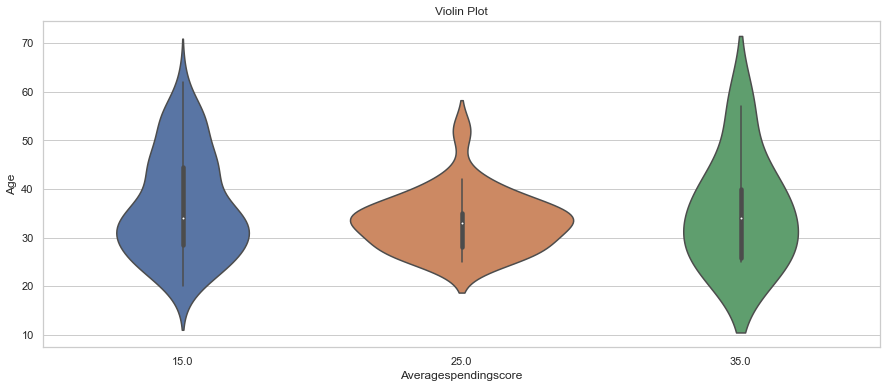

In [25]:
plt.figure(1,figsize=(15,6))
n=0
for cols in ["Averagespendingscore"]:
    n+=1
   
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols,y="Age",data=data)
    plt.ylabel("Age" if n==1 else "")
    plt.title("Violin Plot")
plt.show()

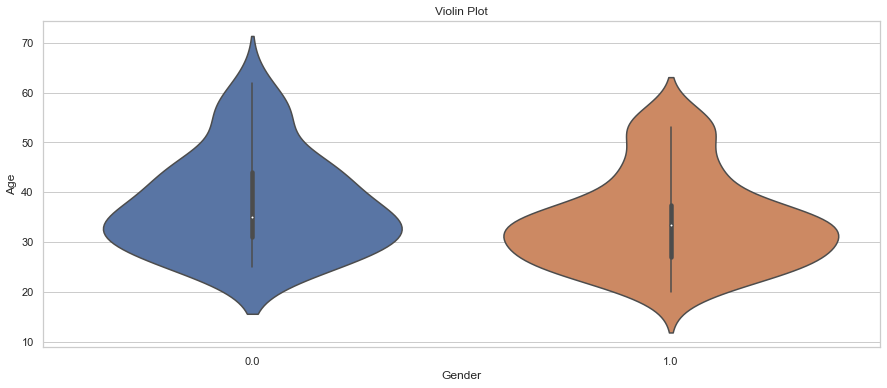

In [26]:
plt.figure(1,figsize=(15,6))
n=0
for cols in ["Gender"]:
    n+=1
   
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols,y="Age",data=data)
    plt.ylabel("Age" if n==1 else "")
    plt.title("Violin Plot")
plt.show()

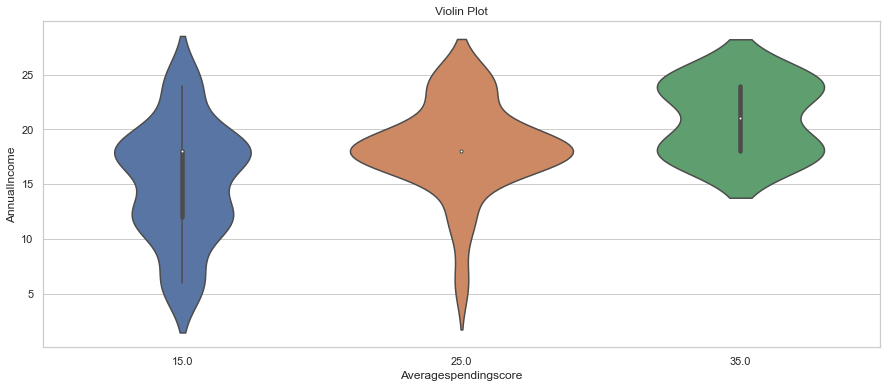

In [27]:
plt.figure(1,figsize=(15,6))
n=0
for cols in ["Averagespendingscore"]:
    n+=1
    
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols,y="AnnualIncome",data=data)
    plt.ylabel("AnnualIncome" if n==1 else "")
    plt.title("Violin Plot")
plt.show()

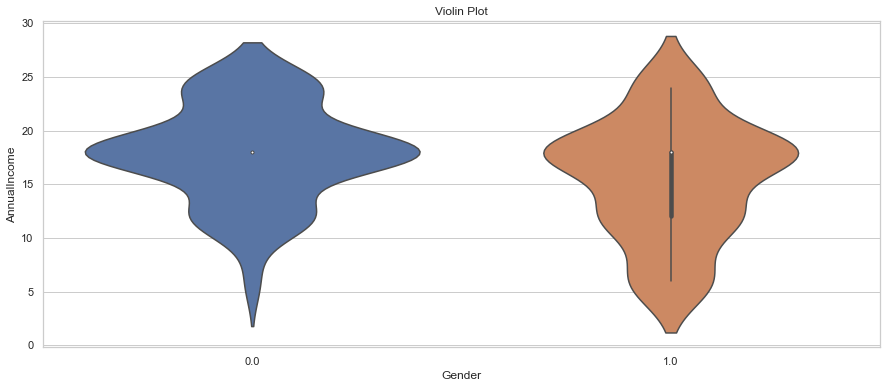

In [28]:
plt.figure(1,figsize=(15,6))
n=0
for cols in ["Gender"]:
    n+=1
   
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols,y="AnnualIncome",data=data)
    plt.ylabel("AnnualIncome" if n==1 else "")
    plt.title("Violin Plot")
plt.show()

<Figure size 1080x432 with 0 Axes>

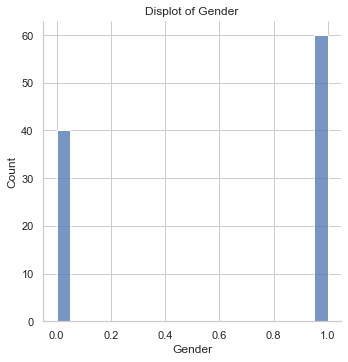

In [29]:
plt.figure(1,figsize=(15,6))
n=0
for x in ["Gender"]:
    n=1
    
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.displot(data[x],bins=20)
    plt.title("Displot of {}".format(x))
plt.show()

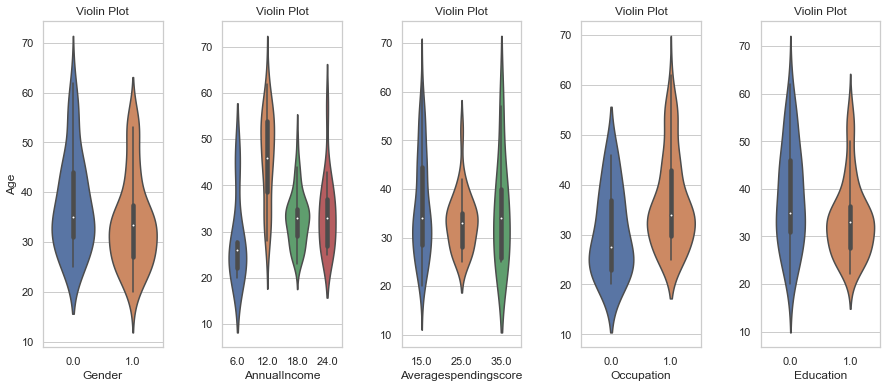

In [30]:
plt.figure(1,figsize=(15,6))
n=0
for cols in ["Gender","AnnualIncome","Averagespendingscore", "Occupation", "Education"]:
    n+=1
    plt.subplot(1,5,n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols,y="Age",data=data)
    plt.ylabel("Age" if n==1 else "")
    plt.title("Violin Plot")
plt.show()

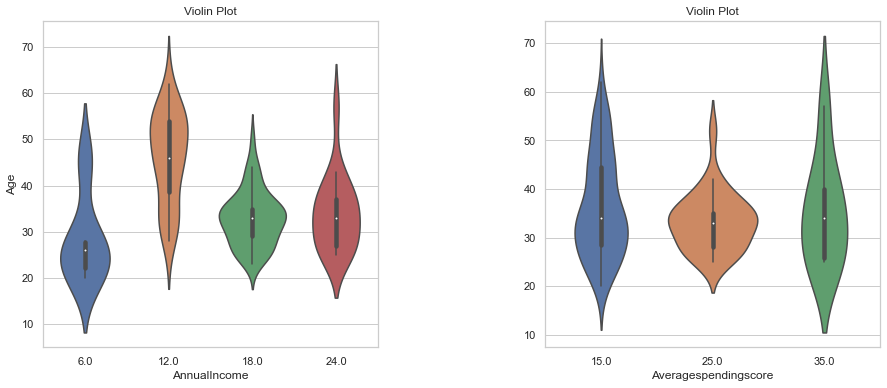

In [31]:
plt.figure(1,figsize=(15,6))
n=0
for cols in ["AnnualIncome","Averagespendingscore"]:
    n+=1
    plt.subplot(1,2,n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols,y="Age",data=data)
    plt.ylabel("Age" if n==1 else "")
    plt.title("Violin Plot")
plt.show()

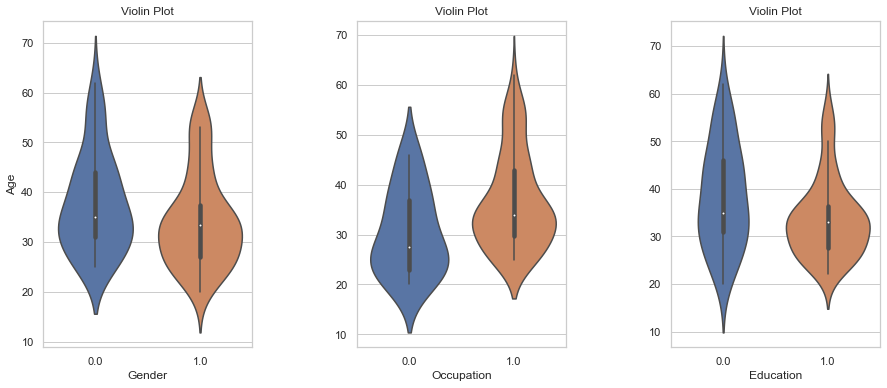

In [32]:
plt.figure(1,figsize=(15,6))
n=0
for cols in ["Gender", "Occupation", "Education"]:
    n+=1
    plt.subplot(1,3,n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols,y="Age",data=data)
    plt.ylabel("Age" if n==1 else "")
    plt.title("Violin Plot")
plt.show()

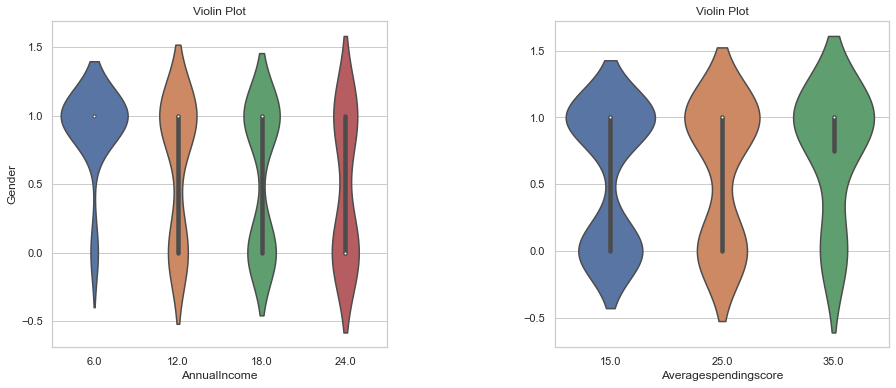

In [33]:
plt.figure(1,figsize=(15,6))
n=0
for cols in ["AnnualIncome","Averagespendingscore"]:
    n+=1
    plt.subplot(1,2,n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols,y="Gender",data=data)
    plt.ylabel("Gender" if n==1 else "")
    plt.title("Violin Plot")
plt.show()

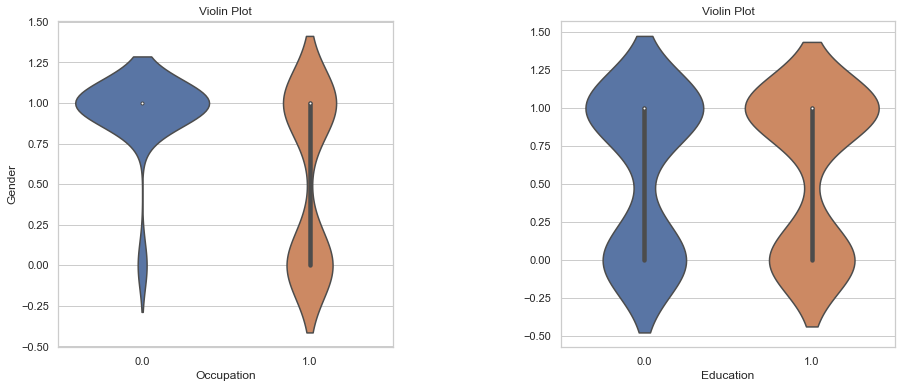

In [34]:
plt.figure(1,figsize=(15,6))
n=0
for cols in [ "Occupation", "Education"]:
    n+=1
    plt.subplot(1,2,n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols,y="Gender",data=data)
    plt.ylabel("Gender" if n==1 else "")
    plt.title("Violin Plot")
plt.show()

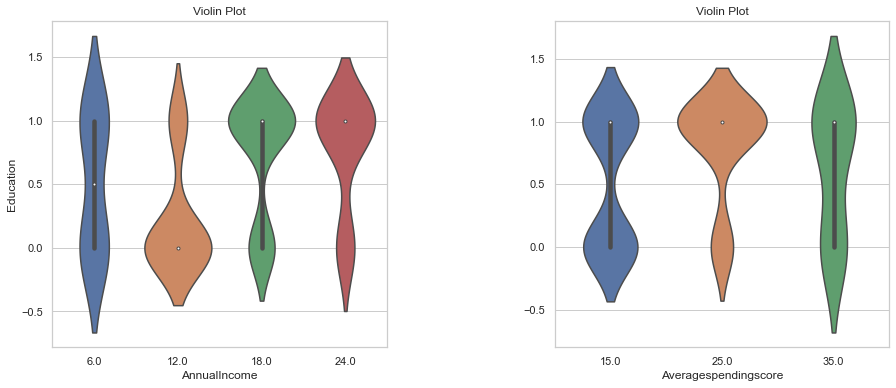

In [35]:
plt.figure(1,figsize=(15,6))
n=0
for cols in ["AnnualIncome","Averagespendingscore"]:
    n+=1
    plt.subplot(1,2,n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols,y="Education",data=data)
    plt.ylabel("Education" if n==1 else "")
    plt.title("Violin Plot")
plt.show()

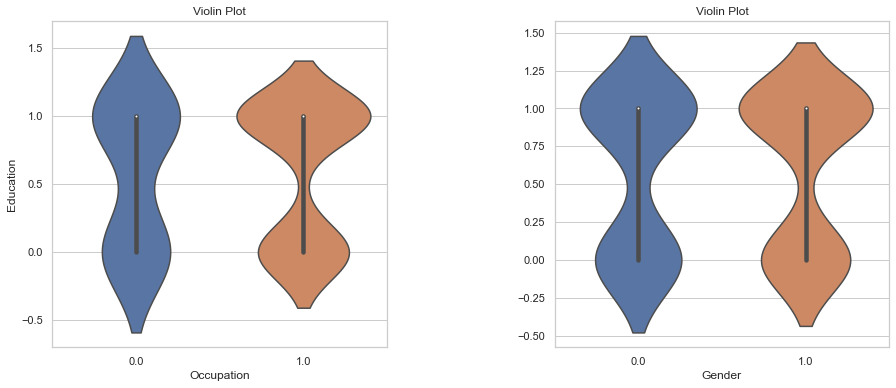

In [36]:
plt.figure(1,figsize=(15,6))
n=0
for cols in ["Occupation", "Gender"]:
    n+=1
    plt.subplot(1,2,n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols,y="Education",data=data)
    plt.ylabel("Education" if n==1 else "")
    plt.title("Violin Plot")
plt.show()

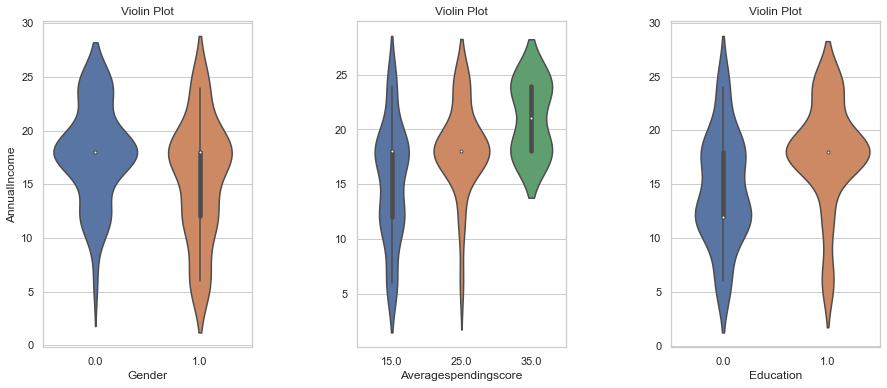

In [37]:
plt.figure(1,figsize=(15,6))
n=0
for cols in ["Gender","Averagespendingscore", "Education"]:
    n+=1
    plt.subplot(1,3,n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols,y="AnnualIncome",data=data)
    plt.ylabel("AnnualIncome" if n==1 else "")
    plt.title("Violin Plot")
plt.show()

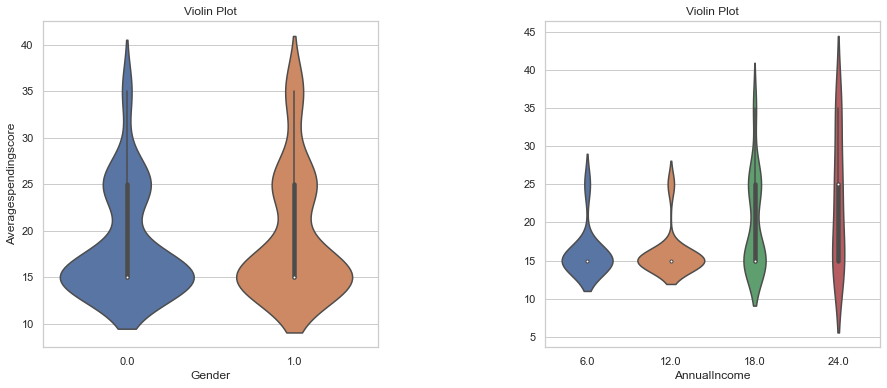

In [38]:
plt.figure(1,figsize=(15,6))
n=0
for cols in ["Gender","AnnualIncome"]:
    n+=1
    plt.subplot(1,2,n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols,y="Averagespendingscore",data=data)
    plt.ylabel("Averagespendingscore" if n==1 else "")
    plt.title("Violin Plot")
plt.show()

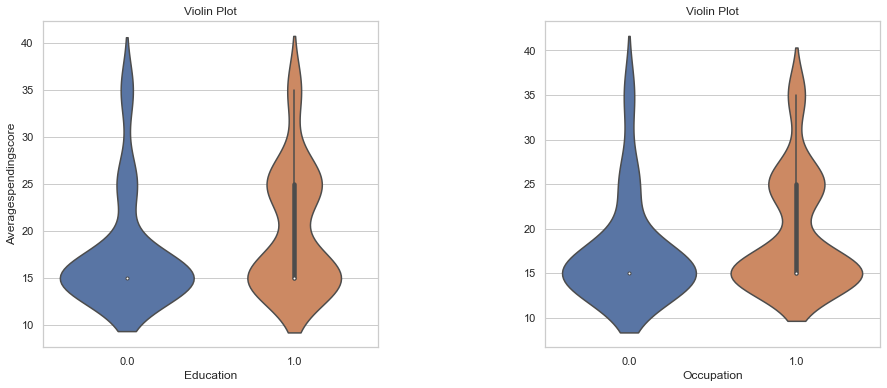

In [39]:
plt.figure(1,figsize=(15,6))
n=0
for cols in ["Education", "Occupation"]:
    n+=1
    plt.subplot(1,2,n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols,y="Averagespendingscore",data=data)
    plt.ylabel("Averagespendingscore" if n==1 else "")
    plt.title("Violin Plot")
plt.show()

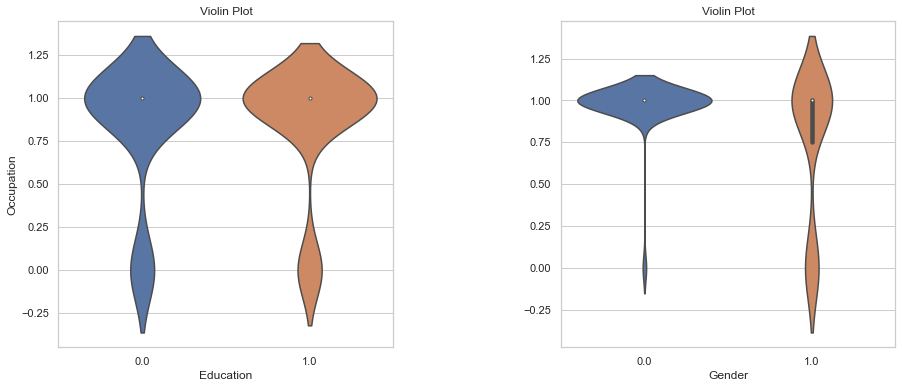

In [40]:
plt.figure(1,figsize=(15,6))
n=0
for cols in ["Education", "Gender"]:
    n+=1
    plt.subplot(1,2,n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols,y="Occupation",data=data)
    plt.ylabel("Occupation" if n==1 else "")
    plt.title("Violin Plot")
plt.show()

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


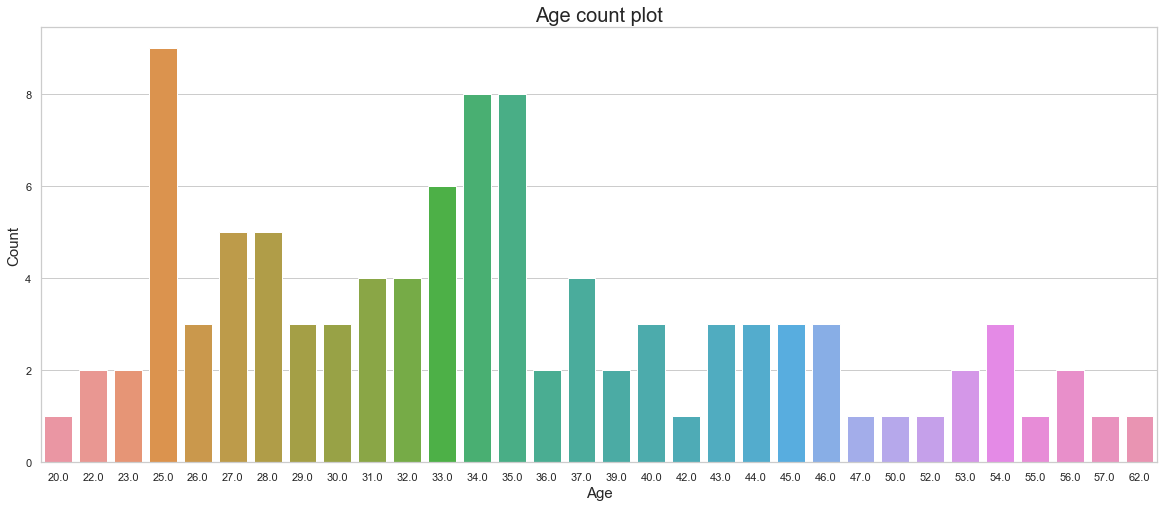

In [41]:
plt.figure(figsize=(20,8))
sns.countplot(data['Age'])
plt.title('Age count plot', fontsize = 20)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


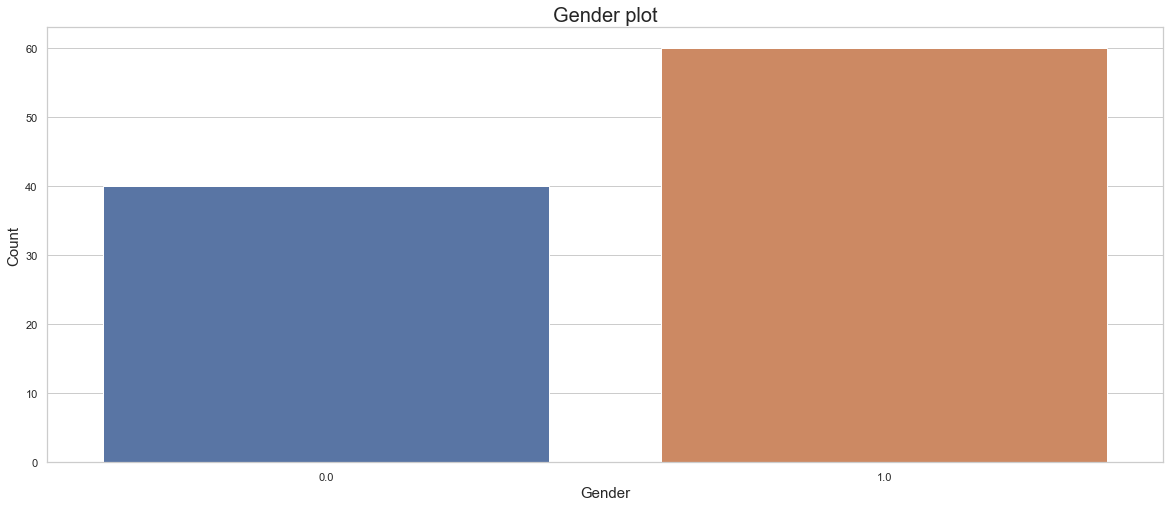

In [42]:
plt.figure(figsize=(20,8))
sns.countplot(data['Gender'])
plt.title('Gender plot', fontsize = 20)
plt.xlabel('Gender', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


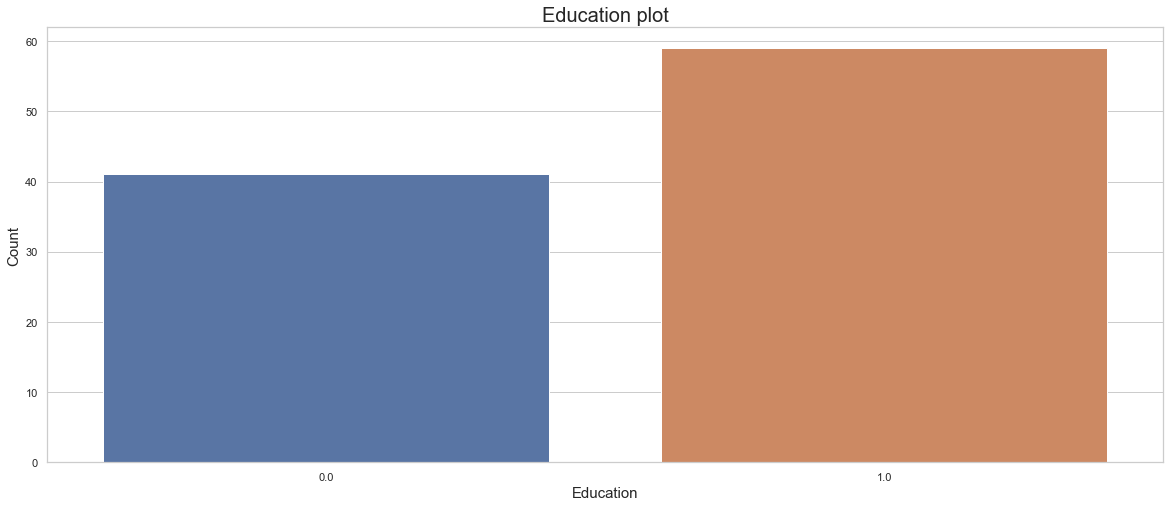

In [43]:
plt.figure(figsize=(20,8))
sns.countplot(data['Education'])
plt.title('Education plot', fontsize = 20)
plt.xlabel('Education', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


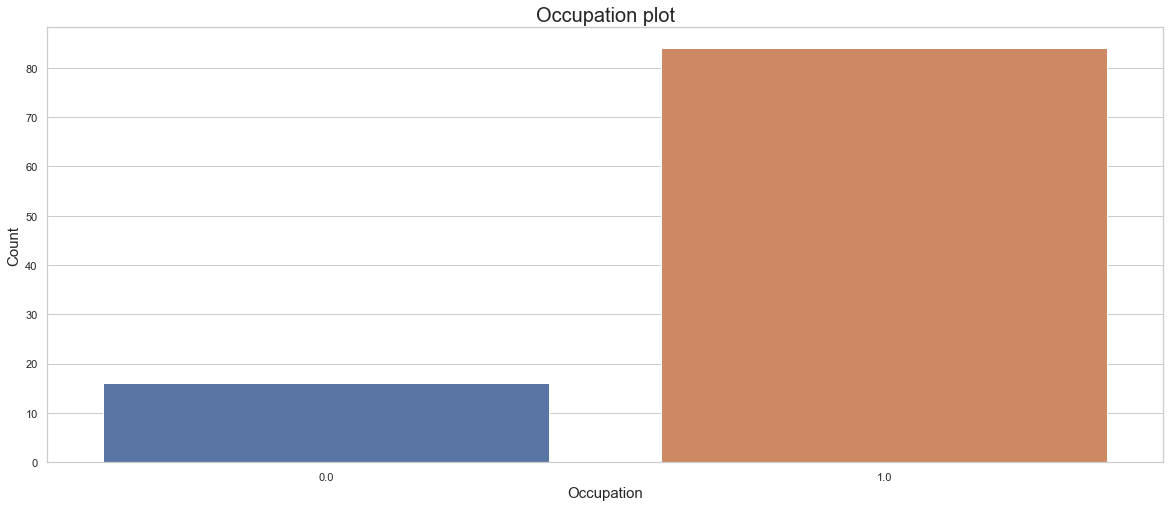

In [44]:
plt.figure(figsize=(20,8))
sns.countplot(data['Occupation'])
plt.title('Occupation plot', fontsize = 20)
plt.xlabel('Occupation', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


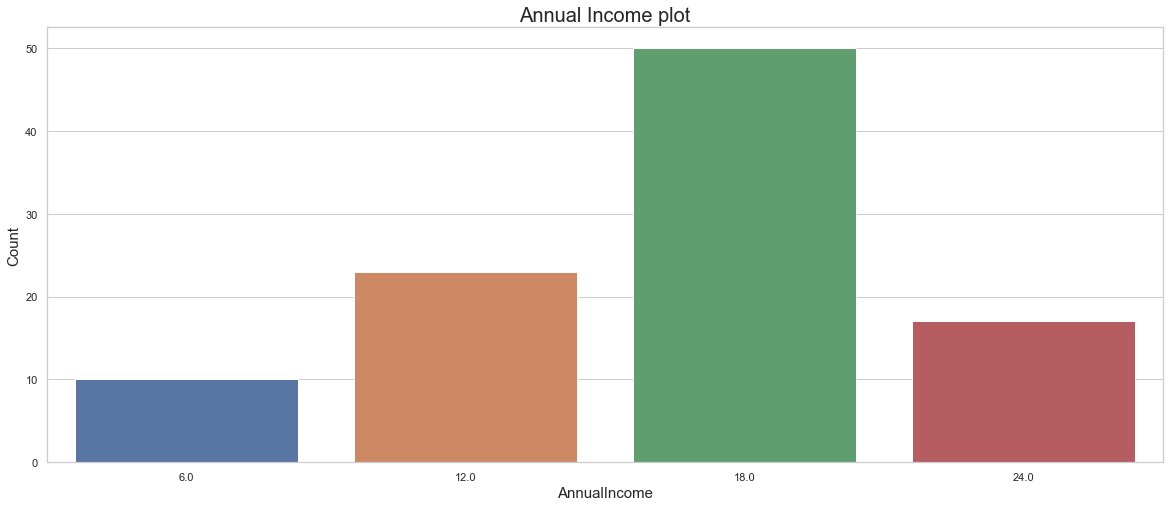

In [45]:
plt.figure(figsize=(20,8))
sns.countplot(data['AnnualIncome'])
plt.title('Annual Income plot', fontsize = 20)
plt.xlabel('AnnualIncome', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


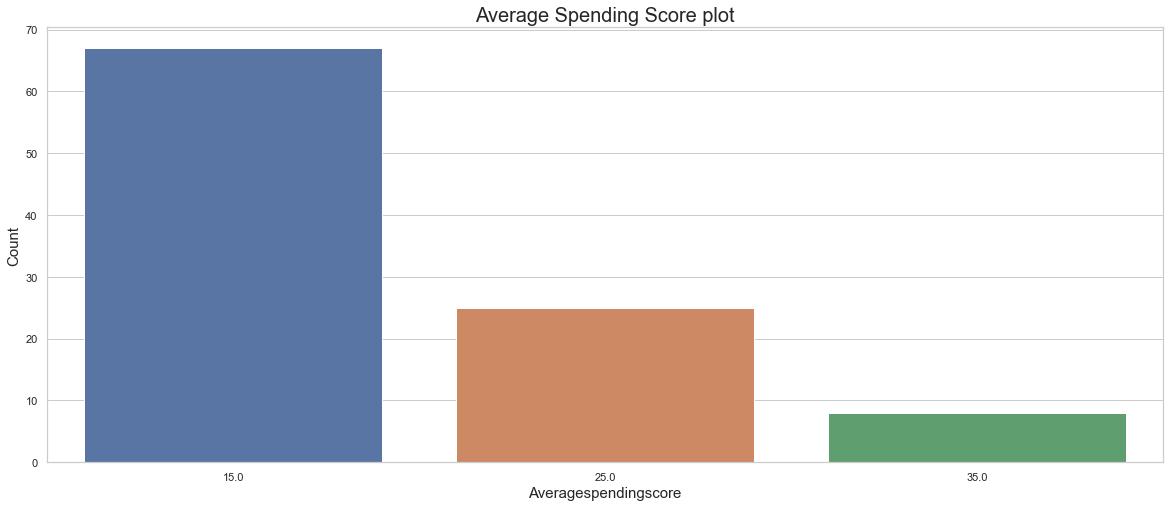

In [46]:
plt.figure(figsize=(20,8))
sns.countplot(data['Averagespendingscore'])
plt.title('Average Spending Score plot', fontsize = 20)
plt.xlabel('Averagespendingscore', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


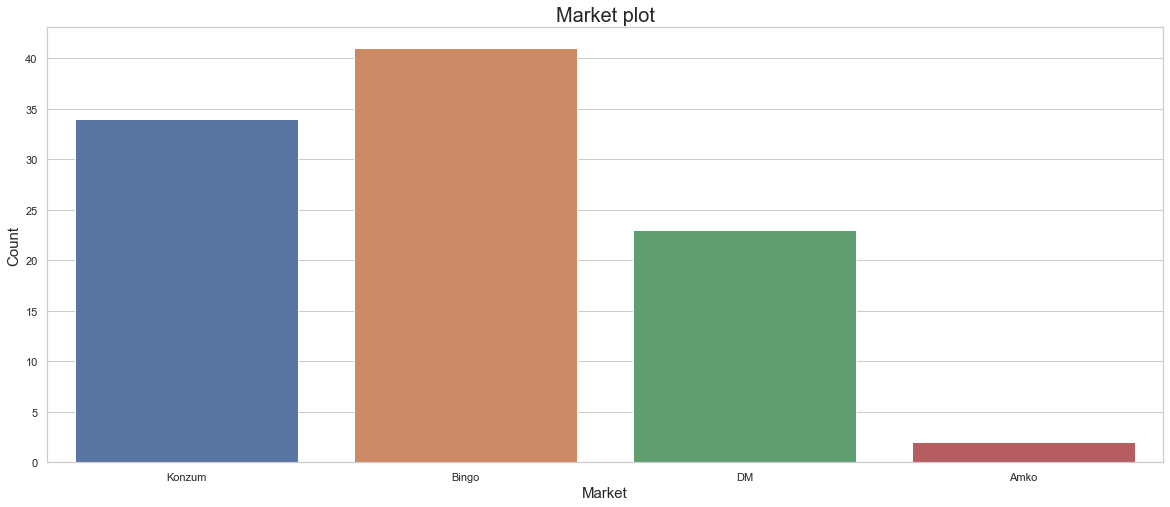

In [47]:
plt.figure(figsize=(20,8))
sns.countplot(data['Market'])
plt.title('Market plot', fontsize = 20)
plt.xlabel('Market', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

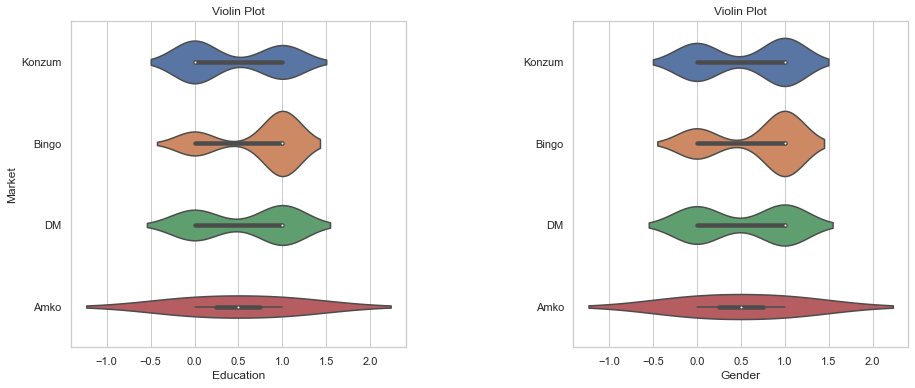

In [48]:
plt.figure(1,figsize=(15,6))
n=0
for cols in ["Education", "Gender"]:
    n+=1
    plt.subplot(1,2,n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols,y="Market",data=data)
    plt.ylabel("Market" if n==1 else "")
    plt.title("Violin Plot")
plt.show()

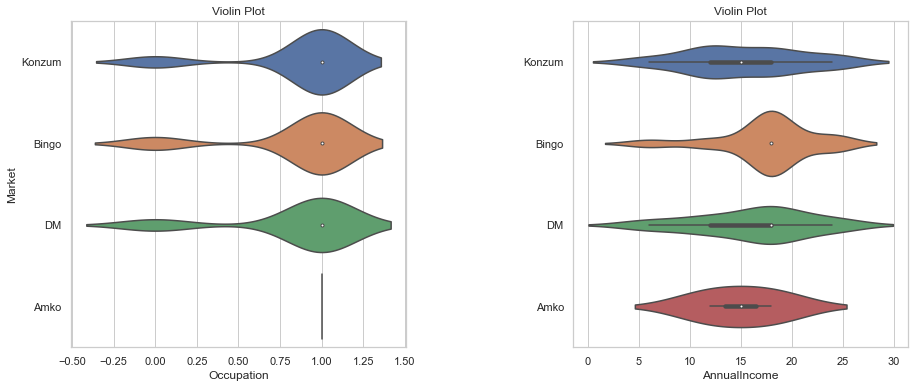

In [49]:
plt.figure(1,figsize=(15,6))
n=0
for cols in ["Occupation", "AnnualIncome"]:
    n+=1
    plt.subplot(1,2,n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols,y="Market",data=data)
    plt.ylabel("Market" if n==1 else "")
    plt.title("Violin Plot")
plt.show()

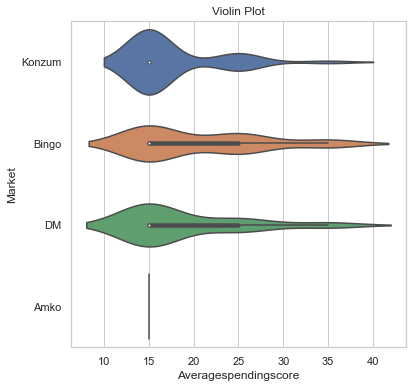

In [50]:
plt.figure(1,figsize=(15,6))
n=0
for cols in ["Averagespendingscore"]:
    n+=1
    plt.subplot(1,2,n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols,y="Market",data=data)
    plt.ylabel("Market" if n==1 else "")
    plt.title("Violin Plot")
plt.show()